## Proyek Predictive Analysis

Nama = Muh Rivandy Setiawan <br>
Email = muhrivandysetiawan@gmail.com <br>
No Hp = 087888511474 <br>
Instagram = muhrivandy77 <br>


## Pengumpulan dan Pengecekan Data

Data yang disajikan adalah data Pertukaran Birtish Pound Sterling dengan US Dollar dari 1 Januari 2014 sampai 16 Oktober 2024- saya bisa upgrade lagi jika diperlukan selama sebulan. Saya sebagai ML Engineering akan memberikan penjelasan dari code ini.

In [1]:
# Import the Library
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
import seaborn as sns

Dataset yang diambil tersedia link dibawah ini! <br>
https://www.investing.com/currencies/gbp-usd-historical-data


In [2]:
# Load the Dataset
gbpusd = pd.read_csv("GBP_USD Historical Data.csv")
# Show the Data
gbpusd

,Date,Price,Open,High,Low,Vol.,Change %
0,10/16/2024,1.3031,1.3064,1.3078,1.2982,NaN,-0.32%
1,10/15/2024,1.3072,1.3060,1.3104,1.3035,NaN,0.10%
2,10/14/2024,1.3059,1.3064,1.3073,1.3029,NaN,-0.05%
3,10/11/2024,1.3066,1.3059,1.3085,1.3041,NaN,0.06%
4,10/10/2024,1.3058,1.3072,1.3096,1.3021,NaN,-0.09%
...,...,...,...,...,...,...,...
2811,01/07/2014,1.6403,1.6406,1.6440,1.6374,NaN,-0.02%
2812,01/06/2014,1.6406,1.6410,1.6435,1.6338,NaN,-0.06%
2813,01/03/2014,1.6416,1.6454,1.6477,1.6397,NaN,-0.23%
2814,01/02/2014,1.6454,1.6566,1.6606,1.6415,NaN,-0.68%


Karena isi volumenya tidak ada dan terdapat NaN, maka perlu dihapus dan hanya menyediakan nilai yang tersedia saja.

In [3]:
# Assuming 'Vol.' is the column name you want to drop
gbpusd = gbpusd.drop('Vol.', axis=1)

# Show the updated DataFrame
gbpusd

,Date,Price,Open,High,Low,Change %
0,10/16/2024,1.3031,1.3064,1.3078,1.2982,-0.32%
1,10/15/2024,1.3072,1.3060,1.3104,1.3035,0.10%
2,10/14/2024,1.3059,1.3064,1.3073,1.3029,-0.05%
3,10/11/2024,1.3066,1.3059,1.3085,1.3041,0.06%
4,10/10/2024,1.3058,1.3072,1.3096,1.3021,-0.09%
...,...,...,...,...,...,...
2811,01/07/2014,1.6403,1.6406,1.6440,1.6374,-0.02%
2812,01/06/2014,1.6406,1.6410,1.6435,1.6338,-0.06%
2813,01/03/2014,1.6416,1.6454,1.6477,1.6397,-0.23%
2814,01/02/2014,1.6454,1.6566,1.6606,1.6415,-0.68%


Pada tabel di atas tersedia 7 kolom yang terdiri dari:
1. Date = Tanggal yang dicatat dalam per hari
2. Price = Harga penutupan British Pound Sterling  dalam satu hari perdagangan.
3. Open = Harga pembukaan British Pound Sterling dalam satu hari perdagangan.
4. High = Harga tertinggi British Pound Sterling dalam satu hari perdagangan.
5. Low = Harga terendah British Pound Sterling dalam satu hari perdagangan.
6. Change % = Persentase perubahan harga British Pound Sterling dalam satu hari

Data ini disajikan dari sekarang sampai 10 tahun yang lalu.

In [4]:
# Give the GBPUSD Info
gbpusd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      2816 non-null   object 
 1   Price     2816 non-null   float64
 2   Open      2816 non-null   float64
 3   High      2816 non-null   float64
 4   Low       2816 non-null   float64
 5   Change %  2816 non-null   object 
dtypes: float64(4), object(2)
memory usage: 132.1+ KB


In [5]:
# Checking GBPUSD Duplicated
gbpusd[gbpusd.duplicated()]

,Date,Price,Open,High,Low,Change %


Ini adalah deskripsi dari British Pound Sterling ke dalam US Dollar.  

In [6]:
# Describe GBPUSD
gbpusd.describe()

,Price,Open,High,Low
count,2816.000000,2816.000000,2816.000000,2816.000000
mean,1.351450,1.351648,1.357125,1.345927
std,0.131583,0.131646,0.131314,0.131936
min,1.068400,1.069000,1.084000,1.038400
25%,1.262100,1.262300,1.267075,1.257775
50%,1.309250,1.309400,1.315150,1.304950
75%,1.401475,1.402050,1.409125,1.397925
max,1.716600,1.716700,1.719300,1.714100


In [7]:
# Checking Volume GBPUSD = 0
gbpusd[gbpusd['Change %'] == 0]

,Date,Price,Open,High,Low,Change %


Data ini telah bersih dan tidak perlu dibersihkan lagi dengan mengatasi missing value sebab hanya 10 tahun terakhir data ini digunakan. Sebelum itu, tipe datanya dikonversi terlebih dahulu

Data tanggalnya diubah menjadi tipe data tanggal terlebih dahulu agar bisa memprediksi harga British Pound Sterling.

In [8]:
# Change 'Date' column become datetime type
gbpusd['Date'] = pd.to_datetime(gbpusd['Date'])

Setelah itu, Harga dan perubahan harga dikonversi dan angka koma dan persen digantikan.

In [9]:
# Delete comma symbol and conversion column to numeric type (Price, Open, High, Low)
cols_to_convert = ['Price', 'Open', 'High', 'Low', 'Change %']
for col in cols_to_convert:
    # Delete comma symbol and percent, then conversion to float
    if col == 'Change %':
        # Convert the column to string type before using .str accessor
        gbpusd[col] = gbpusd[col].astype(str).str.replace('%', '').astype(float)
    else:
        # Ensure the column is of string type before applying .str methods
        gbpusd[col] = gbpusd[col].astype(str).str.replace(',', '').astype(float)

Cek kembali Kolom Data dan Harga British Pound Sterling apakah tipe datanya sesuai yang diinginkan.

In [10]:
# Show information dataset after conversion
print(gbpusd.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2816 entries, 0 to 2815
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2816 non-null   datetime64[ns]
 1   Price     2816 non-null   float64       
 2   Open      2816 non-null   float64       
 3   High      2816 non-null   float64       
 4   Low       2816 non-null   float64       
 5   Change %  2816 non-null   float64       
dtypes: datetime64[ns](1), float64(5)
memory usage: 132.1 KB
None


Sekarang data yang dibutuhkan bisa diukur ke boxplot. Boxplot mengidentifikasi outlier (nilai pencilan) dalam data.

<Axes: xlabel='Price'>

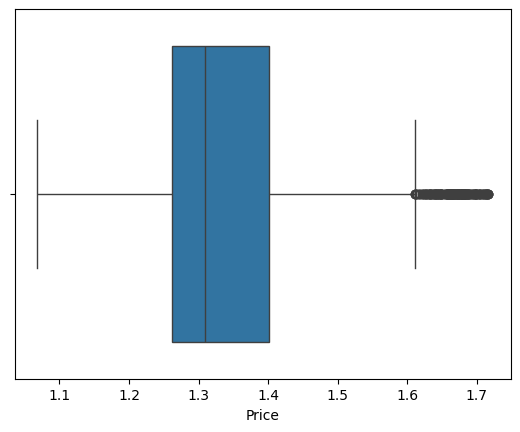

In [11]:
# Creates a box plot of GBPUSD prices.
sns.boxplot(x=gbpusd['Price'])

<Axes: xlabel='Open'>

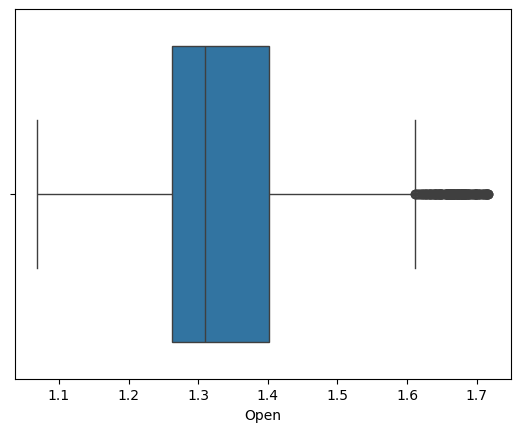

In [12]:
# Creates a box plot of GBPUSD Open.
sns.boxplot(x=gbpusd['Open'])

<Axes: xlabel='High'>

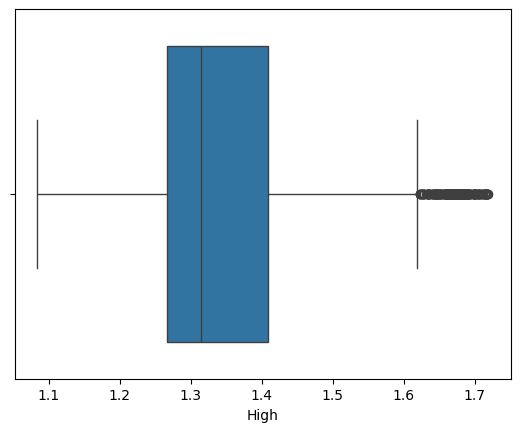

In [13]:
# Creates a box plot of GBPUSD High.
sns.boxplot(x=gbpusd['High'])

<Axes: xlabel='Low'>

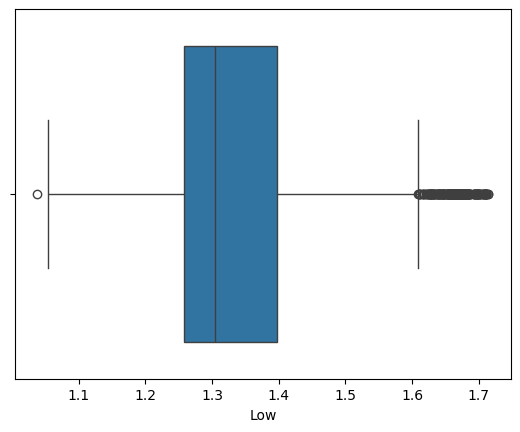

In [14]:
# Creates a box plot of GBPUSD Low.
sns.boxplot(x=gbpusd['Low'])

<Axes: xlabel='Change %'>

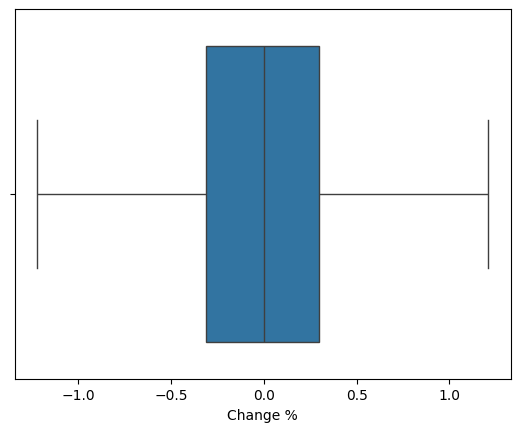

In [15]:
# Creates a box plot of GBPUSD Change in %.
sns.boxplot(x=gbpusd['Change %'], showfliers=False)

## Univariat Analysis

Tipe datanya telah diubah menjadi tipe data yang diinginkan. Pengubahan tipe data ini ditujukan agar bisa melakukan sebuah forecast dalam harga pasar British Pound Sterling

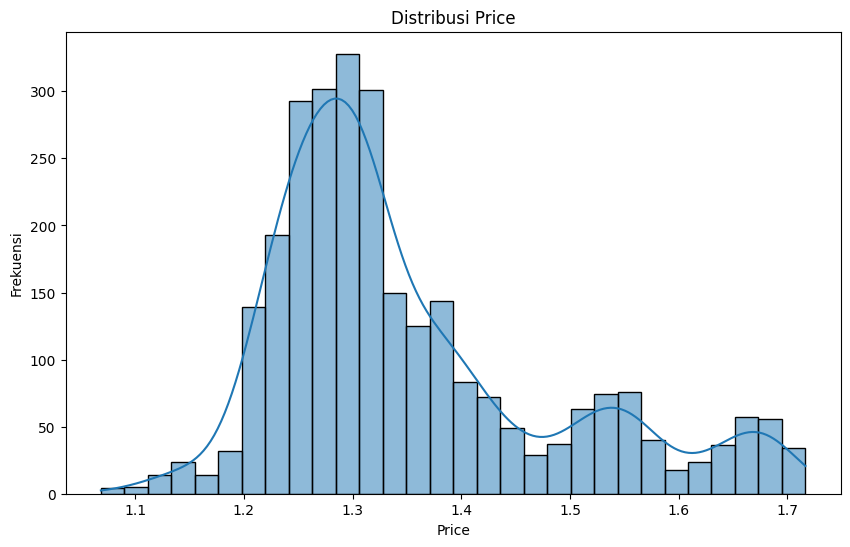

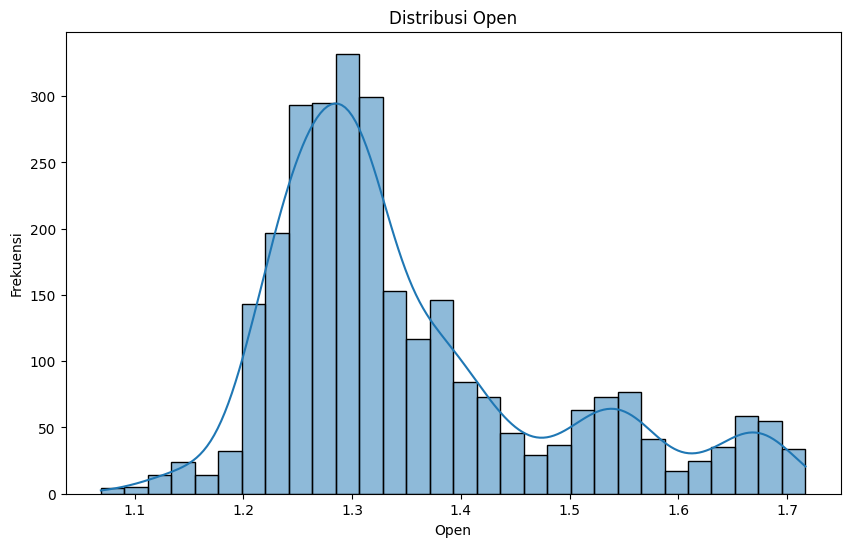

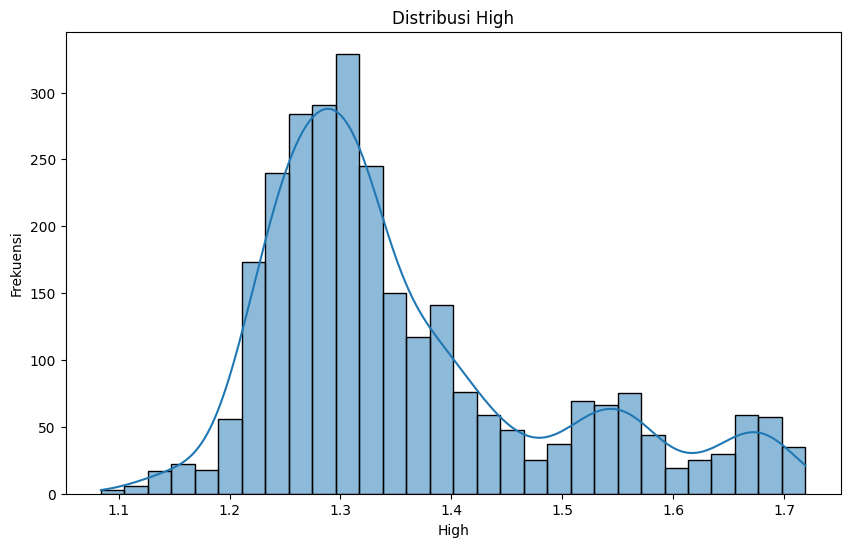

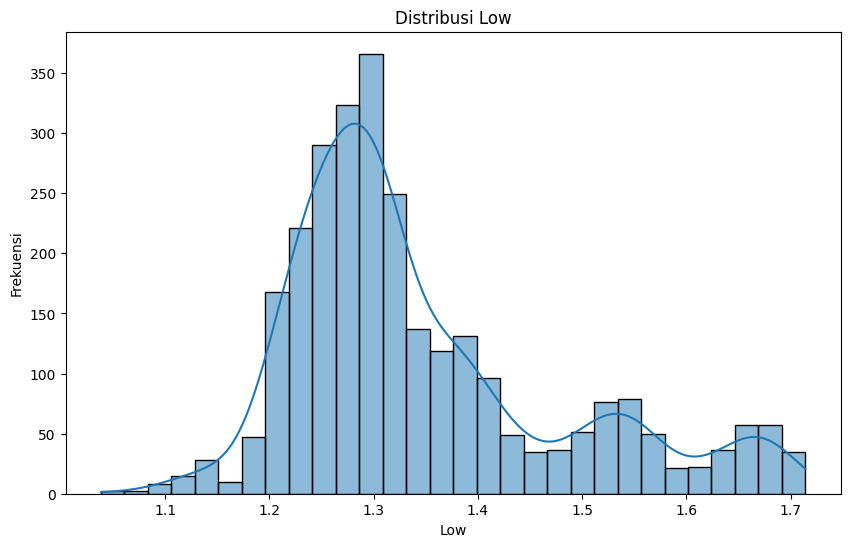

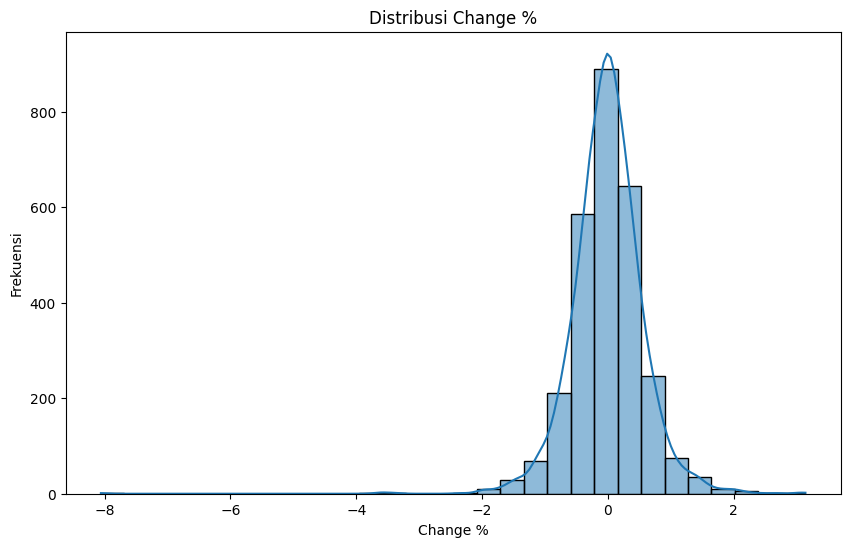

In [16]:
# Create fucntion for univariate analysis
def univariate_analysis(column):
    # Plot column distribution
    plt.figure(figsize=(10, 6))
    sns.histplot(gbpusd[column], bins=30, kde=True)
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')
    plt.show()

# Univariate analysis for column 'Price'
univariate_analysis('Price')

# Univariate analysis for column 'Price'
univariate_analysis('Open')

# Univariate analysis for column 'Price'
univariate_analysis('High')

# Univariate analysis for column 'Price'
univariate_analysis('Low')

# Univariate analysis for another column
univariate_analysis('Change %')

Pada data dan chart di atas merupakan analisis univariat yang terdiri dari:
 1. count (jumlah data);
 2. rata-rata,
 3. standar deviasi;
 4. minimal angka;
 5. Q1;
 6. Median;
 7. Q3;
 8. maksimal.

 Tidak ada nilai null dan duplikat. Lalu dalam frekuensi itu adalah jumlah berapa banyak data itu.


Frekuensi dalam analisis univariat menunjukkan seberapa sering suatu nilai atau kategori muncul dalam suatu variabel.

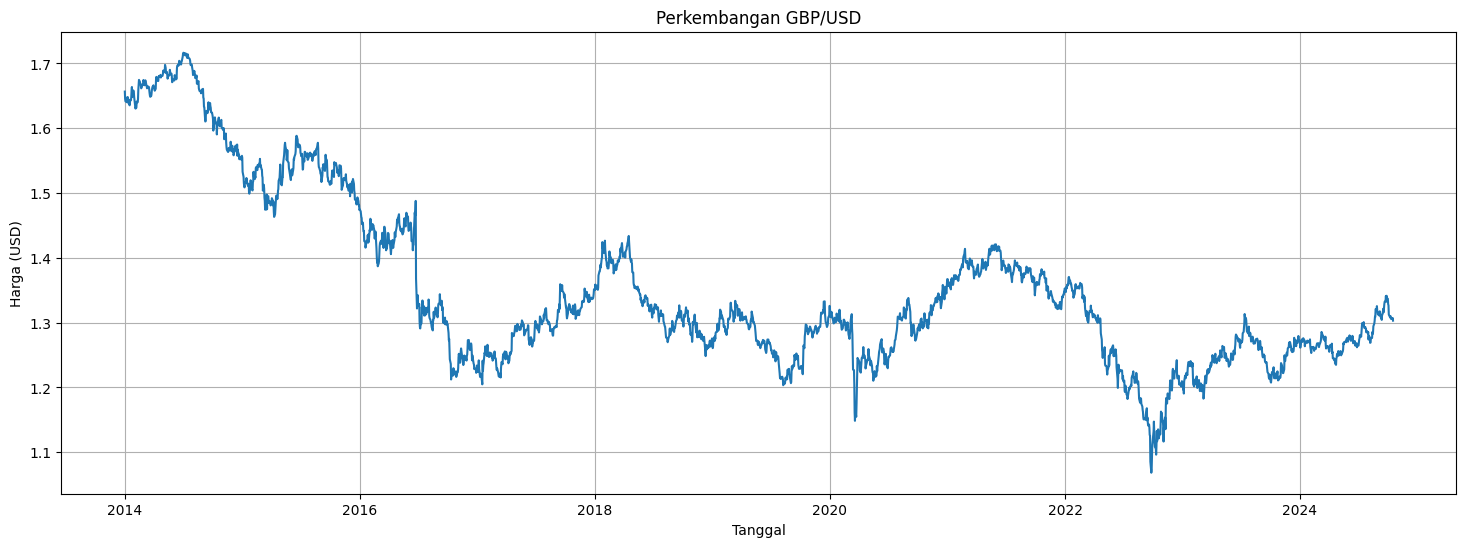

In [17]:
# Price Bitcoin from 2014 to 2024
plt.figure(figsize=(18, 6))
plt.plot(gbpusd['Date'], gbpusd['Price'])
plt.title('Perkembangan GBP/USD')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.show()

Ini adalah Harga British Pound Sterling yang ditarik dari 2014 sampai sekarang!

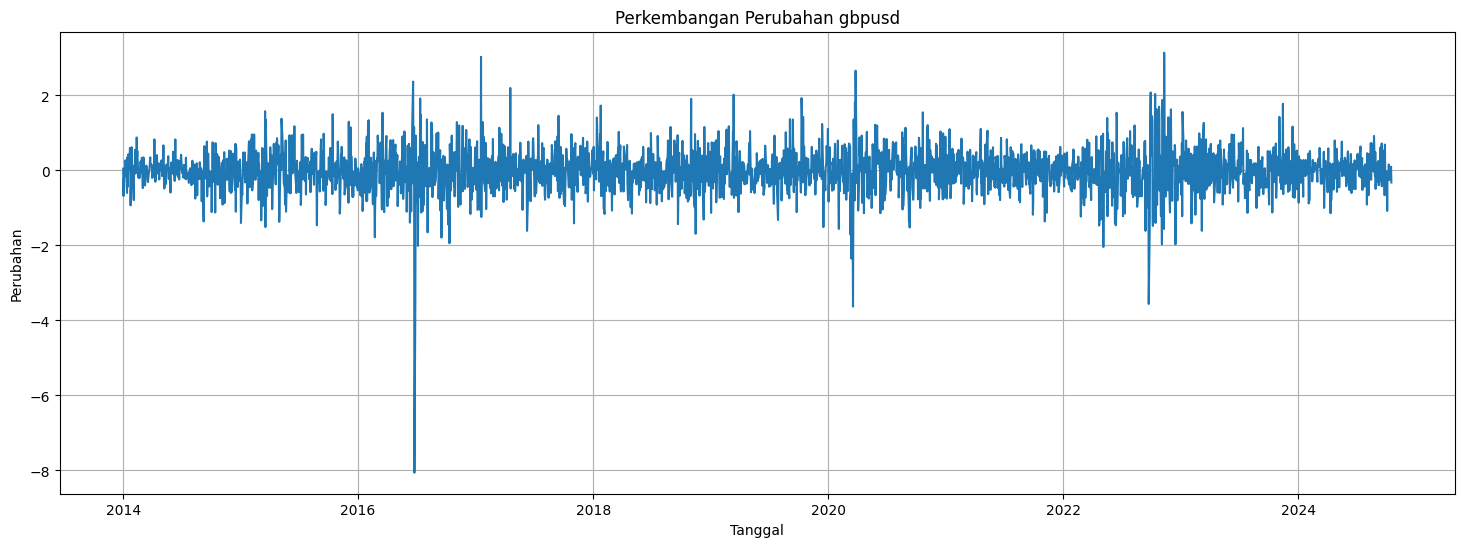

In [18]:
# Change % Bitcoin in from 2014 to 2024
plt.figure(figsize=(18, 6))
plt.plot(gbpusd['Date'], gbpusd['Change %'])
plt.title('Perkembangan Perubahan gbpusd')
plt.xlabel('Tanggal')
plt.ylabel('Perubahan')
plt.grid(True)
plt.show()

## Multivariat Analysis

Ini adalah chart persentase perubahan Harga Pound Sterling yang dihitung perhari. Bisa positif dan bisa negatif

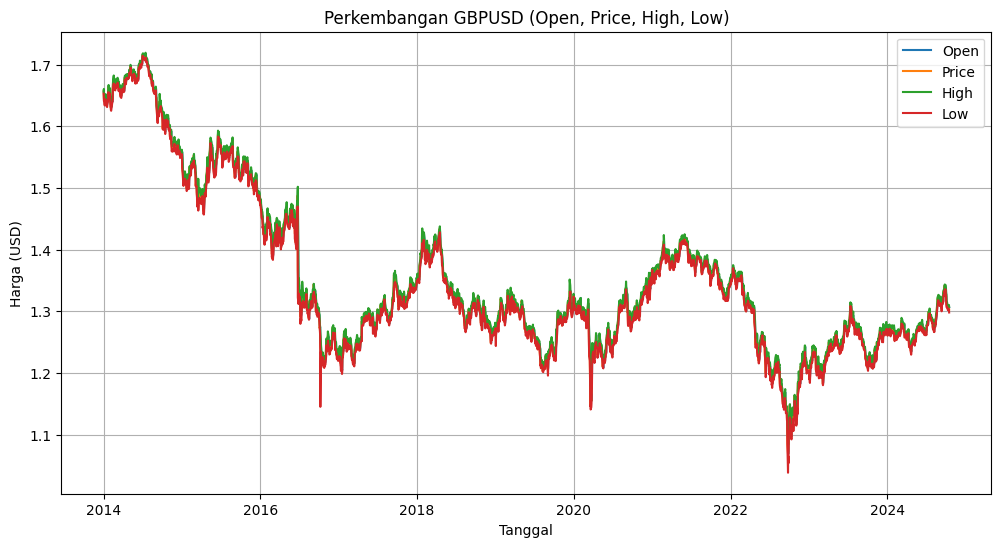

In [19]:
# Multivariate Analysis Bitcoin from 2014 to 2024
plt.figure(figsize=(12, 6))
plt.plot(gbpusd['Date'], gbpusd['Open'], label='Open')
plt.plot(gbpusd['Date'], gbpusd['Price'], label='Price')
plt.plot(gbpusd['Date'], gbpusd['High'], label='High')
plt.plot(gbpusd['Date'], gbpusd['Low'], label='Low')
plt.title('Perkembangan GBPUSD (Open, Price, High, Low)')
plt.xlabel('Tanggal')
plt.ylabel('Harga (USD)')
plt.grid(True)
plt.legend()
plt.show()


Disini diperlihatkan chart Bitcoin sudah termasuk open, price (close), high, dan low.

Terdapat 2 analisis multivariat yang bisa dianalisis, yakni Pairpolot dan Correlation Matrix. Pairplot Memvisualisasikan hubungan antara setiap pasangan variabel dalam dataset.Sedangkan, Correlation Matrix Menghitung dan menampilkan korelasi antar variabel dalam dataset.

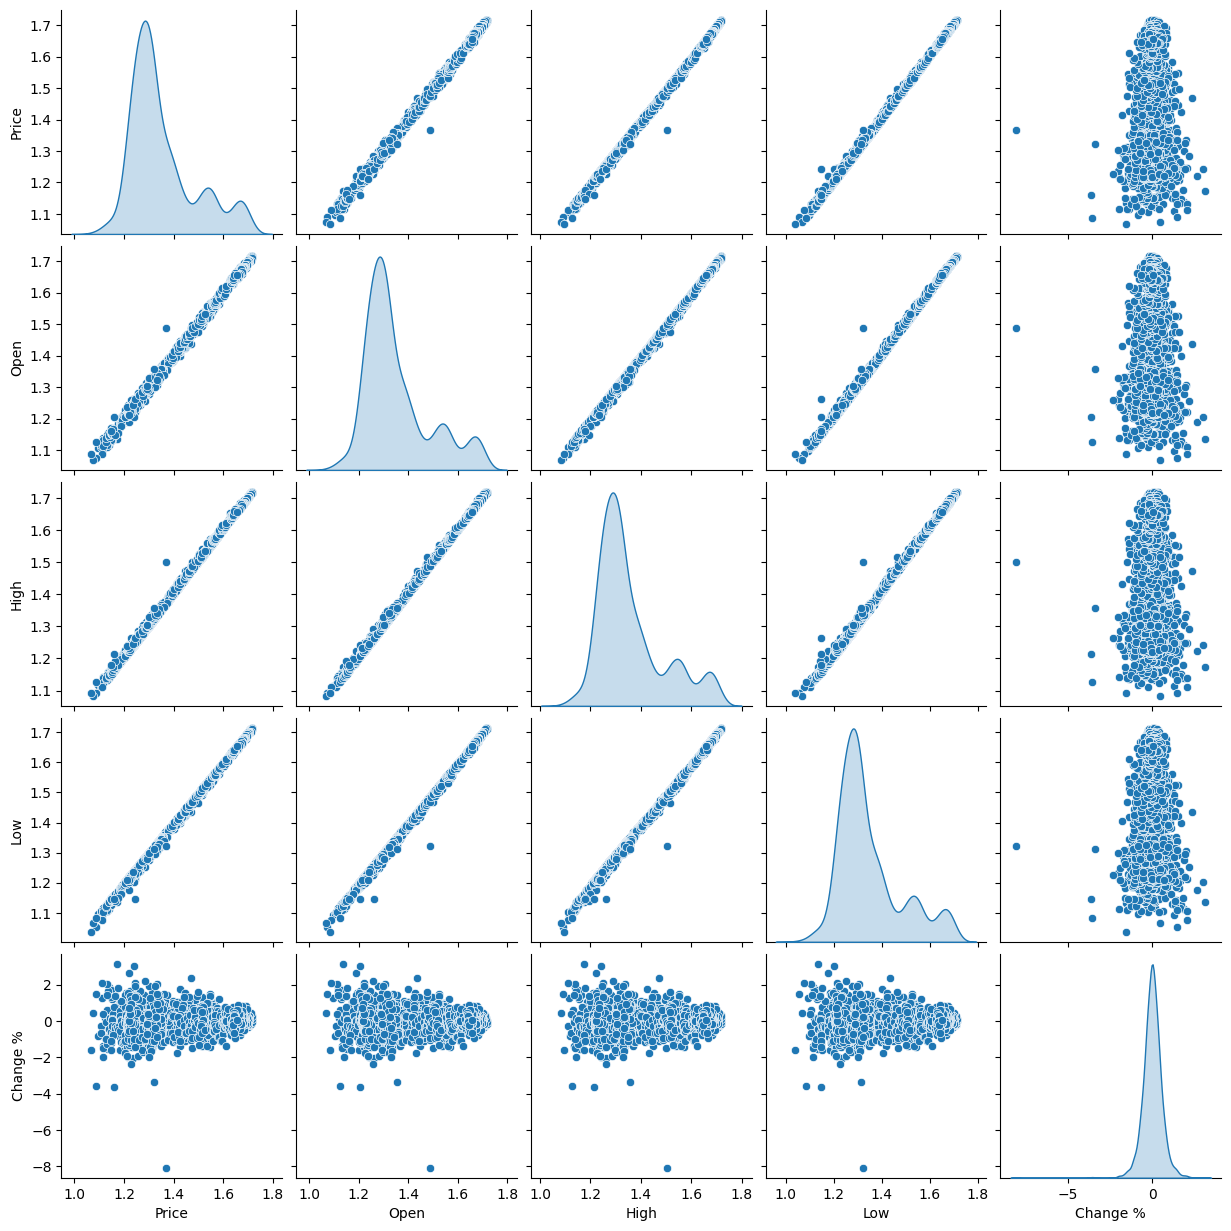

In [20]:
# Relationship numerik feature with pairplot() function
sns.pairplot(gbpusd, diag_kind = 'kde')

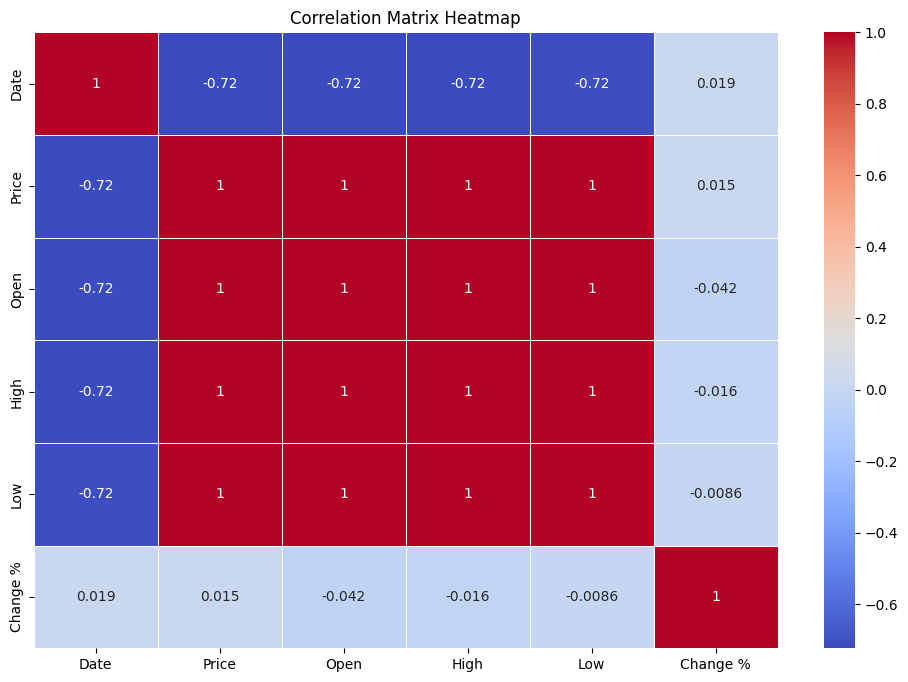

In [21]:
# Correlation matrix
correlation_matrix = gbpusd.corr()

# Plotting heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

## Data Preparation
Sekarang, analisis persiapan data dengan menggunakan PCA untuk mereduksi dimensi data dengan tetap mempertahankan sebanyak mungkin informasi penting dari data asli.

In [22]:
# reduksi Dimensi
# Import required libraries
import pandas as pd
from sklearn.decomposition import PCA

# Select the columns for PCA
columns_for_pca = ['Open', "High", "Low"]

# Perform PCA
# Change n_components to be less than or equal to the number of features (3 in this case)
pca = PCA(n_components=1, random_state=123)
pca.fit(gbpusd[columns_for_pca])

# Transform the data
principal_components = pca.transform(gbpusd[columns_for_pca])

# If you want to create a new DataFrame with the principal components
# Adjust the number of columns to match n_components
pca_df = pd.DataFrame(
    data=principal_components,
    columns=['PC1']
)

# You can then add this to your original DataFrame if needed
gbpusd_with_pca = pd.concat([gbpusd, pca_df], axis=1)

In [23]:
# Print out the explained variance ratio
print("Explained Variance Ratio:", pca.explained_variance_ratio_.round(1))

Explained Variance Ratio: [1.]


In [24]:
gbpusd_with_pca

,Date,Price,Open,High,Low,Change %,PC1
0,2024-10-16,1.3031,1.3064,1.3078,1.2982,-0.32,-0.082155
1,2024-10-15,1.3072,1.3060,1.3104,1.3035,0.10,-0.077821
2,2024-10-14,1.3059,1.3064,1.3073,1.3029,-0.05,-0.079723
3,2024-10-11,1.3066,1.3059,1.3085,1.3041,0.06,-0.078626
4,2024-10-10,1.3058,1.3072,1.3096,1.3021,-0.09,-0.078399
...,...,...,...,...,...,...,...
2811,2014-01-07,1.6403,1.6406,1.6440,1.6374,-0.02,0.500741
2812,2014-01-06,1.6406,1.6410,1.6435,1.6338,-0.06,0.498601
2813,2014-01-03,1.6416,1.6454,1.6477,1.6397,-0.23,0.506974
2814,2014-01-02,1.6454,1.6566,1.6606,1.6415,-0.68,0.521914


## Train-Test Split Data

Sekarang Data Train dan Test akan dibagi dalam skala 80:20. Data yang diambil untuk training kali ini adalah Price dan Date

In [25]:
# DataFrame GBP/USD after PCA
gbpusd = gbpusd_with_pca

# Take value that needed
price = gbpusd["Price"].values
dates = gbpusd["Date"].values

In [26]:
# Make a Split Ratio
split_ratio = 0.8
split_point = int(len(gbpusd) * split_ratio)

# Create training and testing DataFrames
X_train = price[:split_point]
X_test = price[split_point:]

# Split Dates become train and test
dates_train = dates[:split_point]
dates_test = dates[:split_point]

In [27]:
# Change dimension X_train and X_test become 2D
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

Setelah itu, lakukan MinMaxScaler untuk menskalakan data ke rentang tertentu, biasanya antara 0 dan 1. Ini membantu meningkatkan kinerja model machine learning.

In [28]:
# Import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Choose feature which can standardisation
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)

# Transform data training and testing
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Window Datasets

Window Dataset berfungsi untuk mengubah data deret waktu (time series) menjadi bentuk yang cocok untuk model machine learning.

Cara kerjanya Data dibagi menjadi beberapa jendela (windows) dengan ukuran tertentu. Setiap jendela berisi data historis (input) dan nilai target (output) yang ingin diprediksi. Jendela-jendela ini kemudian digunakan untuk melatih model.

In [29]:
# Import Tensorflow for Window Dataset
import tensorflow as tf

In [30]:
# Define the Window Dataset
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size+1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size+1))
    ds = ds.map(lambda window: (window[:-1], window[-1]))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.batch(batch_size).prefetch(1)
    return ds

In [31]:
# Make a Window Size, Batch Size, and Shuffle Buffer
window_size = 10
batch_size = 32
shuffle_buffer = len(gbpusd)

# Window the price_data
train_set = windowed_dataset(X_train, window_size, batch_size, shuffle_buffer)
test_set = windowed_dataset(X_test, window_size, batch_size, shuffle_buffer)

## Modelling (LSTM)

In [32]:
# Import Library for LSTM
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

In [33]:
# Build LSTM model
model = Sequential() # This line is added to define the model as a Sequential object
model.add(LSTM(units = 64, return_sequences = True, input_shape = [None, 1], activation='tanh'))
model.add(Dropout(0.1))  # Reduced dropout
model.add(LSTM(100, activation='tanh'))  # Increased units
model.add(Dropout(0.1))  # Reduced dropout
model.add(Dense(50, activation='tanh'))  # New Dense layer
model.add(Dense(1))

# Compile the model
optimizer = tf.keras.optimizers.SGD(momentum=0.9)
model.compile(
    loss=tf.keras.losses.Huber(),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["mae"]
)

# Summary the model
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, None, 64)            │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, None, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 100)                 │          66,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 87,997 (343.74 KB)

 Trainable params: 87,997 (343.74 KB)

 Non-trainable params: 0 (0.00 B)

In [34]:
# Train the Model
history = model.fit(train_set, epochs=200, validation_data=test_set)

Epoch 1/200
     71/Unknown 5s 18ms/step - loss: 0.0185 - mae: 0.1352

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 31ms/step - loss: 0.0183 - mae: 0.1344 - val_loss: 0.0042 - val_mae: 0.0832
Epoch 2/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 27ms/step - loss: 0.0011 - mae: 0.0358 - val_loss: 5.1249e-04 - val_mae: 0.0248
Epoch 3/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 9.6697e-04 - mae: 0.0334 - val_loss: 4.9554e-04 - val_mae: 0.0244
Epoch 4/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 9.9189e-04 - mae: 0.0336 - val_loss: 0.0015 - val_mae: 0.0486
Epoch 5/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 8.1928e-04 - mae: 0.0299 - val_loss: 0.0022 - val_mae: 0.0602
Epoch 6/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 3s 43ms/step - loss: 9.2168e-04 - mae: 0.0316 - val_loss: 4.3883e-04 - val_mae: 0.0230
Epoch 7/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 6s 47ms/step - loss: 8.4153e-04 - mae: 0.0299 - val_loss: 0.0012 - val_mae: 0.0423
Epoch 8/200
71/71 ━━━━━━━━━━━━━━━━━━━━ 5s 41ms/step - loss: 8.6493e-04 - mae: 0.0301 - val_loss: 0.0021 - val_mae: 0.0578
Epoch 9/200
71/71 ━━━━━━━━━━━━━━

## Evaluate Result

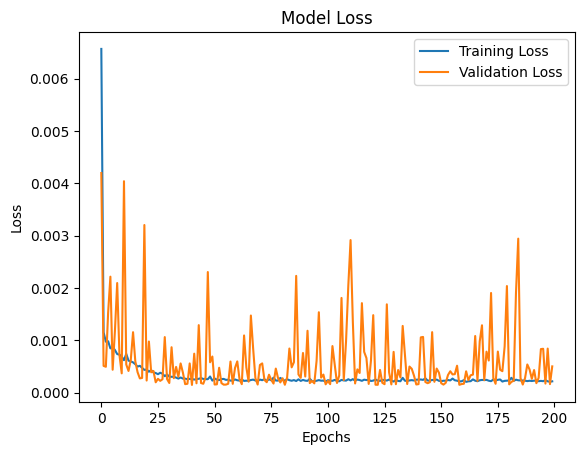

In [35]:
# Plot training loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

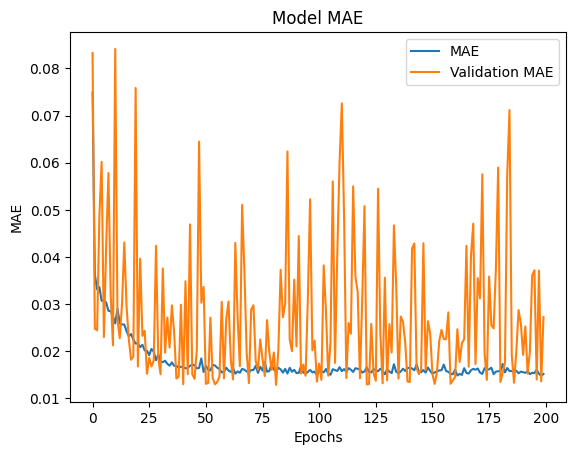

In [36]:
# Plot MAE
plt.plot(history.history['mae'], label='MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.title('Model MAE')
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.legend()
plt.show()

In [37]:
# Print the shape of X_test before reshaping
print("Shape of X_test before reshaping:", X_test.shape)

# Reshape X_test if model needed
x_testReshape = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Print the shape of X_test after reshaping
print("Shape of X_test after reshaping:", x_testReshape.shape)

# Make the predictions
predictions = model.predict(x_testReshape)

# Inversion normalization if needed
predictions = scaler.inverse_transform(predictions)

Shape of X_test before reshaping: (564, 1)
Shape of X_test after reshaping: (564, 1, 1)
18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [38]:
# Show the Prediction
predictions

array([[1.3953879],
       [1.3908732],
       [1.3999977],
       [1.3964671],
       [1.4057791],
       [1.4182999],
       [1.4432293],
       [1.4365268],
       [1.4326352],
       [1.4334139],
       [1.4460424],
       [1.4530157],
       [1.450112 ],
       [1.4544663],
       [1.4497247],
       [1.4457515],
       [1.4526287],
       [1.4609374],
       [1.4623841],
       [1.4437146],
       [1.4458485],
       [1.427765 ],
       [1.4389567],
       [1.4264978],
       [1.437985 ],
       [1.4279599],
       [1.4295189],
       [1.4249375],
       [1.4223033],
       [1.4190813],
       [1.4274726],
       [1.428837 ],
       [1.4440057],
       [1.4433264],
       [1.4469149],
       [1.4565928],
       [1.454273 ],
       [1.4636372],
       [1.4646008],
       [1.4689327],
       [1.4733533],
       [1.476232 ],
       [1.4753687],
       [1.4828402],
       [1.4823619],
       [1.488571 ],
       [1.4939065],
       [1.4923835],
       [1.4880941],
       [1.4836051],


In [39]:
# Show real x_train dan x_valid
x_train_original = scaler.inverse_transform(X_train.reshape(-1, 1))
x_test_original = scaler.inverse_transform(X_test.reshape(-1, 1))

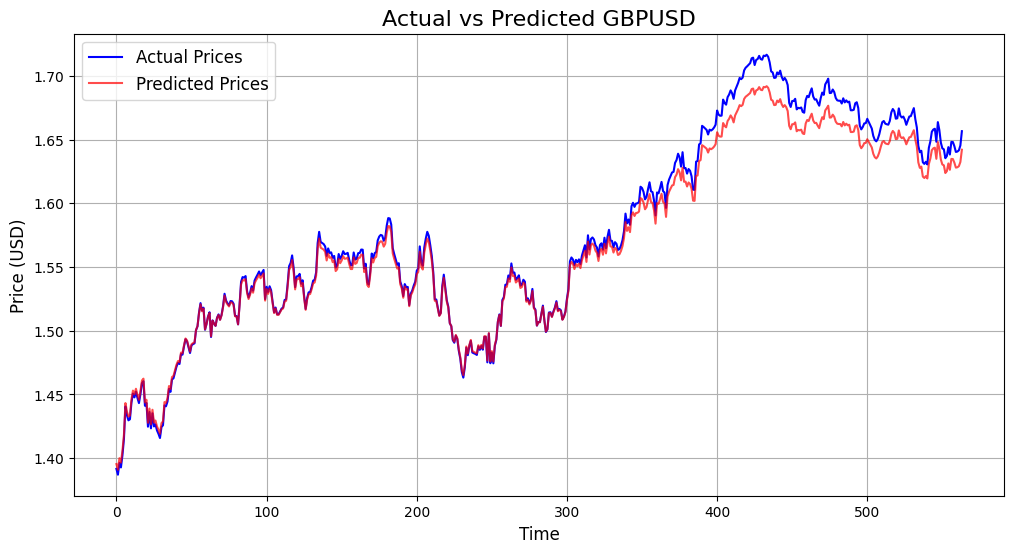

In [40]:
# Plot actual vs predicted prices for the test set
plt.figure(figsize=(12, 6))
plt.plot(x_test_original, label='Actual Prices', color='blue')
plt.plot(predictions, label='Predicted Prices', color='red', alpha=0.7)
plt.title('Actual vs Predicted GBPUSD', fontsize=16)
plt.xlabel('Time', fontsize=12)
plt.ylabel('Price (USD)', fontsize=12)
plt.legend(fontsize=12)
plt.grid(True)  # Add grid for better readability
plt.show()

Kode tersebut memplot perbandingan harga aktual (biru) dan harga prediksi (merah) GBPUSD. Plot ini menggunakan data x_test_original untuk harga aktual dan predictions untuk harga prediksi, dengan label dan judul yang jelas. Grid ditambahkan untuk memudahkan pembacaan.

Print Evaluasi MAE

In [41]:
# Show to MAE Result
print("MAE Result:", history.history['mae'][-1])

MAE Result: 0.015185105614364147
